# Gradient Descent and Backpropagation Example
This tutorial indicates how Gradient Descent and Backpropagation works on the simplest example which is just a line. We consider 'x' as our input and 'w' as our 'weight'. We typically call 'w' weights - for familiarity it is the same as y = mx.

We also then define a loss function. A loss function is also known as an error function. We use the Mean Sqaured Error Function which is indicated below. We define t as the 'ground-truth' or 'correct answer' to get our model to predict.

We define x to be some random numbers between 1 and 20 - and our outputs are y = 2x + noise. Let's gets a model to train and understand this.

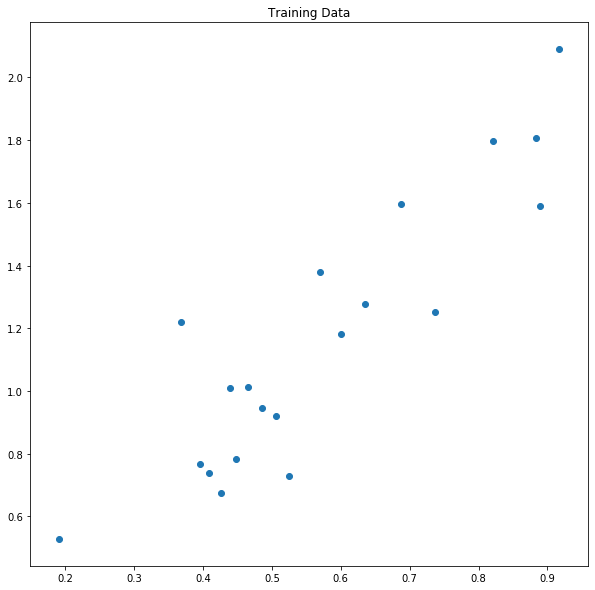

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def model(w, x):
    # y = wx
    return w*x

def mse(y, t):
    # returns the error or difference between the output and expected
    # E = mean((t-y)^2)
    return np.mean((t-y)**2)

# Randomise 20 x inputs between the values of 0 and 2
x = np.random.uniform(0, 1, 20)

def f(x): 
    return x * 2

noise_variance = 0.2  
noise = np.random.randn(x.shape[0]) * noise_variance
# Make some noise
t = f(x) + noise

# Plot x and the target
plt.figure(figsize=(10, 10))
plt.scatter(x, t)
plt.title('Training Data')
plt.show()

### "Gradient Descent can be analogised as like walking down a mountain"
![title](img/walking_down.png)
In order to get to our goal - we need to figure out how well our error is tracking over time. In mathematical terms, we need to calculate the derivate of the error with respect to the weights. This can be achieved using the chain rule - if you guys rememeber first year math.

We need to calculate dE/dW.

dE/dy = 2(y-t)
dy/dW = x

Thus, dE/dW = dE/dy * dy/dW

In [2]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (model(w,x) - t)

Now we know how the error is tracking over time, we can utilise that information to update what our weights should be. This is now called backpropagation or weight updating. Remember the mean above, in the mse function? We incorporate that mean into the update function. It is usally known as delta. 

We also introduce a new parameter is called the learning rate 'lr'. The learning rate dictates how much we update the weights at a given time.

In [3]:
def delta_w(w_k, x, t, lr):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))

In [4]:
# Randomly initialise weights
w = np.random.rand()

# Set the learning rate
learning_rate = 0.7

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 5  # number of gradient descent updates
history = [(w, mse(model(x, w), t))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter
    history.append((w, mse(model(x, w), t)))  # Save weight and loss
    print('Iteration ', i, '\t Weights are: ', w,  '\t Loss is: ', mse(model(w, x), t))

Iteration  0 	 Weights are:  1.3647343116515018 	 Loss is:  0.19877341150763803
Iteration  1 	 Weights are:  1.7046987456924554 	 Loss is:  0.07554851583590168
Iteration  2 	 Weights are:  1.872184023051751 	 Loss is:  0.04564069551871981
Iteration  3 	 Weights are:  1.9546965311947087 	 Loss is:  0.03838179129121962
Iteration  4 	 Weights are:  1.9953467549480253 	 Loss is:  0.036619988190050495


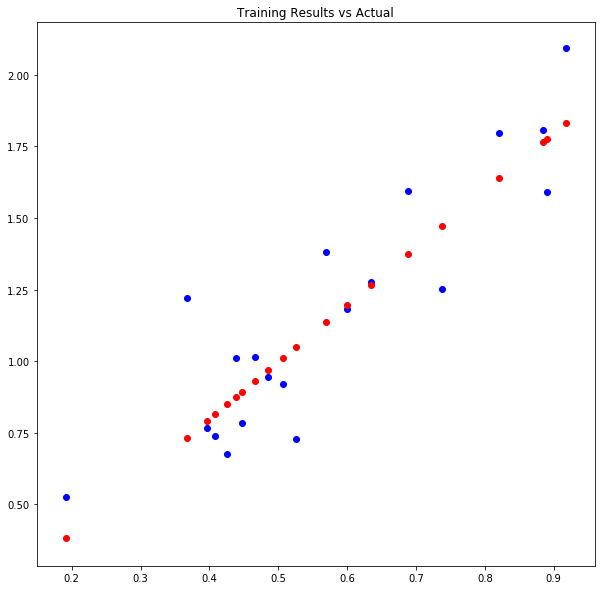

In [5]:
# Grab the y outputs from our trained model
y = model(w,x)

# Plot the results vs actual
plt.figure(figsize=(10, 10))
plt.scatter(x, t, c='b', label='ground truth')
plt.scatter(x, y, c='r', label='trained data')
plt.title('Training Results vs Actual')
plt.show()